#1. Prepare the environment

In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-799919be-3cc9-fdea-c9d1-ae39cc807411)


In [2]:
import sys
print(f"Python {sys.version}\n")

import numpy as np
print(f"Numpy {np.__version__}\n")

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(f"TensorFlow {tf.__version__}")
print(f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}")

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print(f"TensorFlow detected {len(gpus)} GPU(s):")
for i,gpu in enumerate(gpus):
  print(f"...GPU No.{i} : Name = {gpu.name}, Type = {gpu.device_type}")

Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]

Numpy 1.21.5

TensorFlow 2.8.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
...GPU No.0 : Name = /physical_device:GPU:0, Type = GPU


In [3]:
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import cv2 as cv

#2. Prepair Image list

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
Sotorns = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Image_Dataset/Sothon/*.png')  # 0-99
Tos = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Image_Dataset/Toh/*.png') # 105-204
Banlambs = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Image_Dataset/Wat Ban Laem/*.png') # 205-305
Watraikings = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Image_Dataset/Wat Rai Khing/*.png') # 306-405
Thongs = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Image_Dataset/Thong/*.png') # 406-505

In [6]:
filelist = []
filelist.extend(Sotorns)
filelist.extend(Tos)
filelist.extend(Banlambs)
filelist.extend(Watraikings)
filelist.extend(Thongs)

In [7]:
instances = []
img_w, img_h = 224,224
for file_name in filelist:
    img = tf.keras.preprocessing.image.load_img(file_name, target_size = (img_w, img_h))
    instances.append(img)

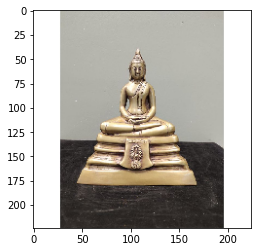

In [8]:
x = tf.keras.preprocessing.image.img_to_array(instances[0])
plt.imshow(x.astype(np.uint8))

In [9]:
#COnvert PIL image to Numpy Array
img_list = []

for img in instances:
    x = tf.keras.preprocessing.image.img_to_array(img)
    img_list.append(x.astype(np.uint8))

In [10]:
img_array = np.array(img_list)
img_array.shape

(501, 224, 224, 3)

In [11]:
# get Y 
ans_list = ['Sothon','Toh','Wat Ban Laem','Wat Rai Khing','Thong']
name_index = []
for file in filelist:
  ans = file.split('/')[7]
  name_index.append(ans_list.index(ans))
print(name_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [12]:
name_index = np.expand_dims(name_index, axis = 1)

name_index.shape

(501, 1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(img_array, name_index, test_size=0.33, random_state=42)

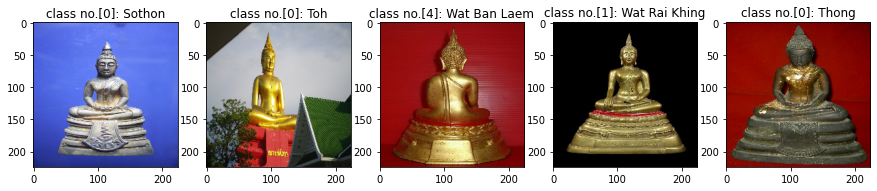

In [14]:
#visualize

plt.figure(figsize = (15,5))
for i in range(5):
    plt.subplot(150+1+i).set_title(f"class no.{y_train[i]}: {ans_list[i]}")
    plt.imshow(x_train[i])
plt.show()

In [15]:
# Plot y_train and count value
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 55, 1: 75, 2: 74, 3: 70, 4: 61}

#2. Load the pretrained model

In [16]:
# Load the ImageNet VGG-16 model, including both the feature extractor part and the classifier part
# By default, VGG-16 is designed for an input image of dimension 224x224x3

np.random.seed(1234)
tf.random.set_seed(5678)



base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_w,img_h,3))
base_model.trainable = False # Not trainable weights

base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

#3. Train Model

In [18]:
#Preprocessing
x_train_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input(x_train)
x_test_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input(x_test)

In [21]:
#Add new classification head

x = base_model.output

#add custom layer to end of existing model
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(5)(x)
new_outputs = tf.keras.activations.softmax(new_outputs)

#Constrauct the main model
model = tf.keras.models.Model(inputs = base_model.inputs, outputs = new_outputs)
model.compile(loss = "sparse_categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [22]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights.hdf5",  monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]
#history = model.fit(x_train_vgg, y_train,
#          validation_data=(x_test_vgg,y_test),
#          callbacks=[callbacks_list],
#          batch_size=100,
#          verbose=2, epochs=100)

history = model.fit(x_train_preprocess, y_train, callbacks=[callbacks_list], batch_size=100, verbose=2, epochs=100, validation_split = 0.2)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.16418, saving model to best_weights.hdf5
3/3 - 5s - loss: 4.2940 - accuracy: 0.2164 - val_loss: 4.2364 - val_accuracy: 0.1642 - 5s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.16418 to 0.29851, saving model to best_weights.hdf5
3/3 - 2s - loss: 4.3684 - accuracy: 0.3246 - val_loss: 1.6843 - val_accuracy: 0.2985 - 2s/epoch - 562ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.29851 to 0.59701, saving model to best_weights.hdf5
3/3 - 2s - loss: 1.9009 - accuracy: 0.4478 - val_loss: 0.8957 - val_accuracy: 0.5970 - 2s/epoch - 569ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.59701 to 0.67164, saving model to best_weights.hdf5
3/3 - 2s - loss: 1.3034 - accuracy: 0.5410 - val_loss: 0.8344 - val_accuracy: 0.6716 - 2s/epoch - 548ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.67164 to 0.68657, saving model to best_weights.hdf5
3/3 - 2s - loss: 0.9167 - accuracy: 0.6082 - val_loss: 

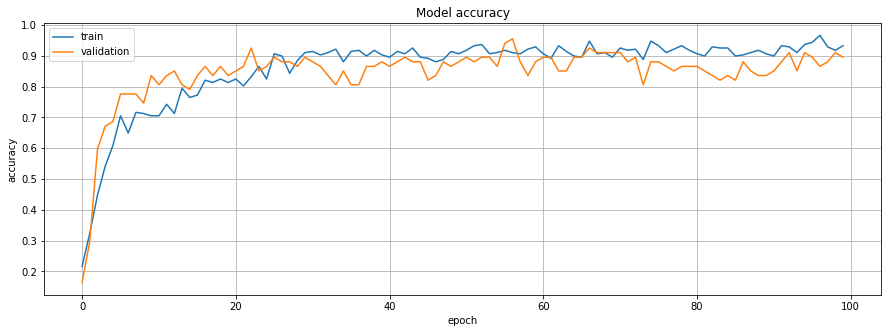

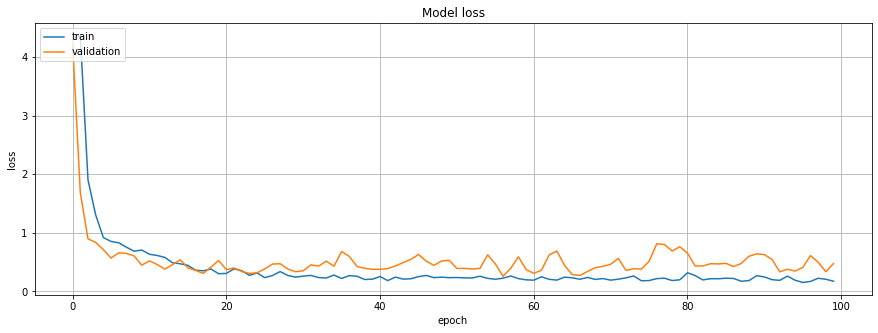

In [23]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

#5. Model Load

In [24]:
model.load_weights('best_weights.hdf5')

In [25]:
#Evaluation

results = model.evaluate(x_test_preprocess, y_test, batch_size = 100)
print(f"{model.metrics_names}: {results}")

2/2 [==============================] - 0s 214ms/step - loss: 0.6756 - accuracy: 0.8795
['loss', 'accuracy']: [0.6755508780479431, 0.8795180916786194]


In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

#6. Adapt the base model

In [27]:
model.layers[-2].activation

<function keras.activations.linear>

In [28]:
def alter_model_for_GradCAM( model, last_conv_layer_name ):
  # 1. Get the output from the layer
  last_conv_output = model.get_layer( last_conv_layer_name ).output
  out_linear = model.layers[-2].output
  out_softmax = model.layers[-1].output
  # 3. Create the new model and assign the weight for the 'prediction_linear' layer
  new_model = tf.keras.Model( inputs=model.inputs, outputs=[out_softmax, out_linear, last_conv_output] )

  return new_model

In [29]:
new_model = alter_model_for_GradCAM( model, 'out_relu')
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [30]:
new_model.output

[<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'tf.nn.softmax_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_10')>,
 <KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'out_relu')>]

#6. GradCAM

--2022-03-16 09:37:46--  https://cv.lnwfile.com/rdk4q7.jpg
Resolving cv.lnwfile.com (cv.lnwfile.com)... 122.155.167.47, 122.155.167.45, 122.155.167.46, ...
Connecting to cv.lnwfile.com (cv.lnwfile.com)|122.155.167.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 664150 (649K) [image/jpeg]
Saving to: ‘rdk4q7.jpg’

rdk4q7.jpg          100%[===================>] 648.58K   607KB/s    in 1.1s    

2022-03-16 09:37:49 (607 KB/s) - ‘rdk4q7.jpg’ saved [664150/664150]



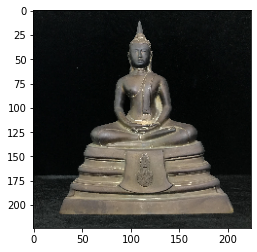

In [31]:
# Load a test image from Internet
img_url =  "https://cv.lnwfile.com/rdk4q7.jpg"
#img_url = "http://img-187.uamulet.com/taradpra.com/UserProfile/SMaeKlong/Picture/Pic_1275472_5.jpg"
!wget "$img_url"

# Load an image as PIL.Image.IMage
img_path = img_url.split("/")[-1]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_w, img_h))

# Convert PIL Image to Numpy ndarray
img = tf.keras.preprocessing.image.img_to_array(img)
img = img.astype(np.uint8)

# Display the NumPy image
plt.imshow(img)
plt.show()

In [32]:
# Preprocess the input image
img_preprocess = tf.keras.applications.vgg16.preprocess_input( np.expand_dims(img, axis=0))

In [33]:
result = model.predict(img_preprocess)
print(result)

[[0.9156925  0.00341259 0.02096641 0.0480046  0.01192381]]


In [34]:
def my_CNN_GradCAM( model, in_img, class_index ):
  # Convert from numpy to tensor
  in_img = tf.cast( in_img, tf.float32 )

  # Compute the gradient of y_c with respect to A_i
  with tf.GradientTape() as tape:
    tape.watch(in_img)
    y_softmax, y_linear, last_conv_activation = model( in_img )
    one_class_score = y_linear[..., class_index ]
    gradient = tape.gradient( one_class_score, last_conv_activation )

    # Compute a vector of alphas (one alpha value is one weight for one 2D feature map) by averaging each 2Dgradient
    gradient = gradient.numpy().squeeze(axis=0)
    alpha = np.mean( gradient, axis=(0,1))

    # Compute the weighted-sum heatmap
    last_conv_activation = last_conv_activation.numpy().squeeze(axis=0)
    heatmap = np.dot(last_conv_activation, alpha)

    # Don't hightlight any pixels with negative gradients (= apply ReLU)
    heatmap = np.maximum(0, heatmap)

    # Return an unnormalized heatmap
    return heatmap

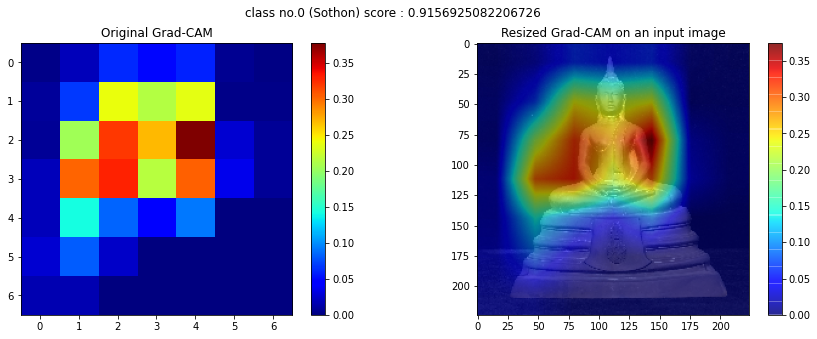

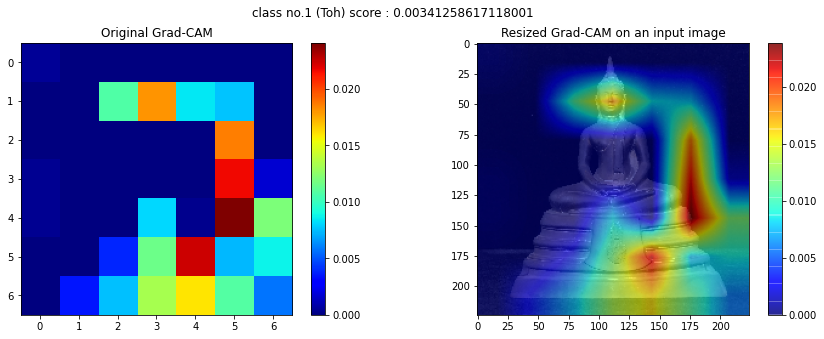

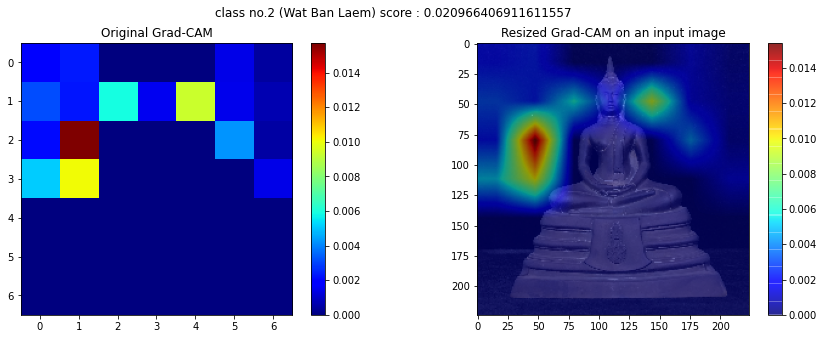

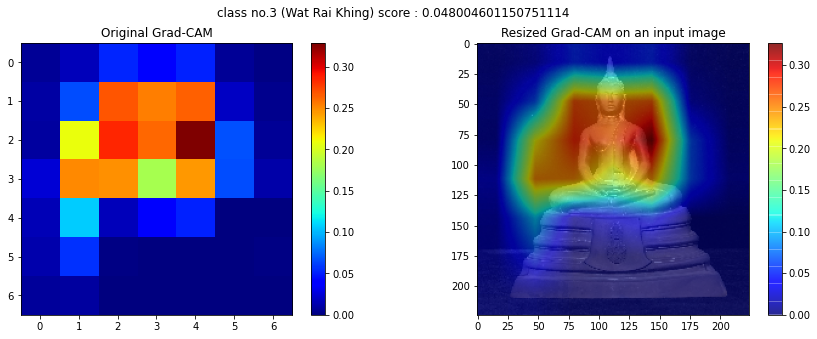

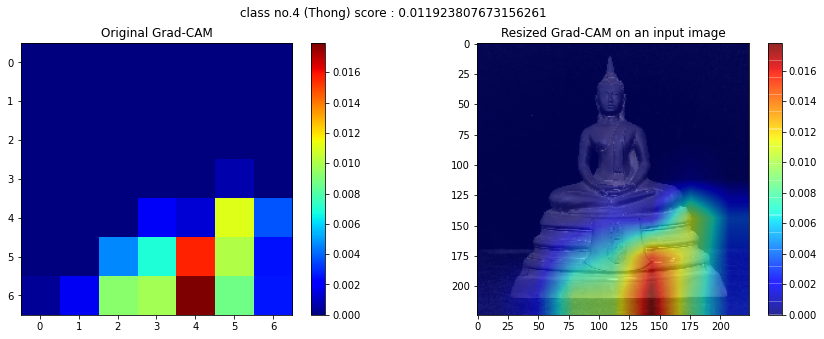

In [35]:
# Get predictions with highest scores
top = 5
#_, top_results = my_imagenet_decode_predictions( out_softmax, top=top )

# Extract 0-based class indices
#top_index = [ tp[0] for tp in top_results[0] ]
top_index = [0,1,2,3,4,5]
# Visualize Grad-CAM for each class whose index is in 'top_index'
#for i,c in enumerate(top_index):
#class_desc = f"{imagenet_dict[c][-1]}, Top {i+1} score of {out_softmax[...,c].squeeze()}"
for c in range(top):
  heatmap = my_CNN_GradCAM( new_model,       # the CNN model
                            img_preprocess,   # input of the model
                            c                 # the 0-based index of the output class to compute and visualize Grad-CAM
                            )
  # Create the main figure
  fig = plt.figure(figsize=(15,5))
  class_desc = ans_list[c]
  fig.suptitle(f"class no.{c} ({class_desc}) score : {result.item(c)}")


  # Visualize the original heatmap
  ax = fig.add_subplot(1,2,1)
  ax.set_title("Original Grad-CAM")
  im = ax.imshow(heatmap, cmap='jet')
  plt.colorbar(im,ax=ax)

  # Visualize the heatmap overlaid on an input image
  ax = fig.add_subplot(1,2,2)
  ax.set_title("Resized Grad-CAM on an input image")
  ax.imshow(img)
  alpha = 0.6
  im = ax.imshow(cv.resize(heatmap,img.shape[:2]), cmap='jet', alpha=alpha)
  plt.colorbar(im,ax=ax)

  #Show this figure (containing two subplots)
  plt.show()